## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Connecting drive and importing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/parkinsons.data")

## Getting the target variable and important features


In [4]:
y = df['status']

In [5]:
X = df[['spread1', 'PPE', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'D2']]

## Splitting dataset into test and train


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44)

The train and test data is split in 80-20 ratio as there are only 197 records. Since the number of records is low, we do not split into a validation set as that might lead to insufficient training data for the model.

## Training and testing Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [8]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
train_pred = rfc.predict(X_train)

Measuring baseline model accuracy and perfomance using Confusion Matrix

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, recall_score, precision_score
train_acc = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_roc_auc_score = roc_auc_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_roc_curve = roc_curve(y_train, train_pred)

In [11]:
print(f"The training data accuracy is : {np.round(train_acc, 2)}")
print(f"The training data precision is : {np.round(train_precision, 2)}")
print(f"The training data recall is : {np.round(train_recall, 2)}")
print(f"The training data f1-score is : {np.round(train_f1, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score, 2)}")

The training data accuracy is : 1.0
The training data precision is : 1.0
The training data recall is : 1.0
The training data f1-score is : 1.0
The training data ROC curve is : [[ 0.  0.  1.]
 [ 0.  1.  1.]
 [inf  1.  0.]]
The training data ROC-AUC score is : 1.0


*   The accuracy of the Random Forest Classifier baseline model is 1.0. However, since the classes are not balanced, accuracy can be a misleading measure. Hence, F1 score and and ROC-AUC score were calculated.

*   The F1 score considers both precision and recall into account, and the F1 score of the SVC model (1.0) shows that the rate of false negatives is low.

*   The ROC-AUC score on the other hand, evaluates the model performance for the binary classification model. The 1.0 ROC-AUC score means, the model is able to distinguish positive and negative instances 100% of the time which means the model is not making random predictions.


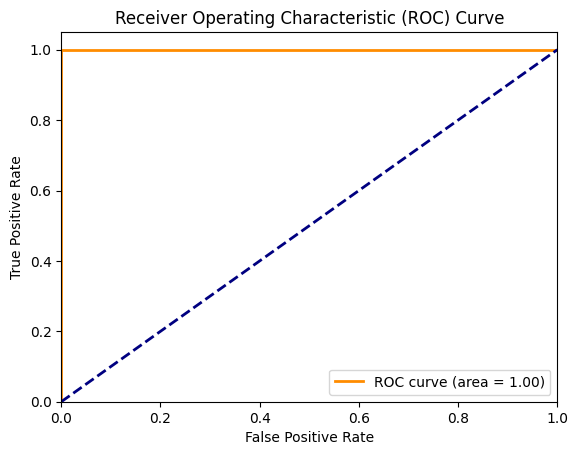

In [12]:
from sklearn.metrics import auc, RocCurveDisplay

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(train_fpr, train_tpr)

plt.figure()
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
print("False Positive Rate: ", train_fpr)
print("True Positive Rate: ", train_tpr)
print("Thresholds: ", train_thresholds)
print("AUC: ", train_roc_auc)

False Positive Rate:  [0. 0. 1.]
True Positive Rate:  [0. 1. 1.]
Thresholds:  [inf  1.  0.]
AUC:  1.0


* The threshold value goes from infinity to 1 to 0 which means the no positives were predicted at first, then 1 suggests correct prediction but moving to 0 suggests all the instances were predicted positive.

* The FPR value goes from 0 to 0 to 1 which suggests no false positives were predicted at first, the second value 1 suggests 0% of the negative samples were misclassified as positive and finally the 1 suggests all negatives were incorrectly classified as positives.

* The TPR value goes from 0 to 1 to 1 which suggests no true positives were predicted at first, the second value 1 suggests 100% of the positive samples were classified correctly and finally the 1 suggests all positives were correctly classified as positives.



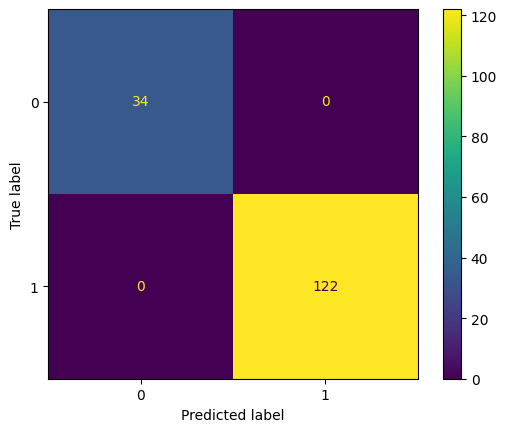

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_va_dt = confusion_matrix(y_train, train_pred)
cm_val_dt = ConfusionMatrixDisplay(confusion_matrix_va_dt)

cm_val_dt.plot()
plt.show()


*   The confusion matrix gives us further understanding of best ROC-AUC score of 1.0. 0 of the negatives have been incorrectly classified as positive. This explains the Random Forest Classifier model trained, is ideal for making correct predictions PD and healthy people.

*   However, we will further test it on larger dataset to test the model performance.



## Considering all the features

In [14]:
updated_df = df.copy().drop(columns=['name', 'status'], axis=1)

In [15]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(updated_df,y, test_size=0.2, random_state=4)

In [16]:
rfc_full = RandomForestClassifier()

In [17]:
rfc_full.fit(X_train_full, y_train_full)

RandomForestClassifier()

In [18]:
train_pred_full = rfc_full.predict(X_train_full)

In [19]:
train_acc_full = accuracy_score(y_train_full, train_pred_full)
train_precision_full = precision_score(y_train_full, train_pred_full)
train_roc_auc_score_full = roc_auc_score(y_train_full, train_pred_full)
train_recall_full = recall_score(y_train_full, train_pred_full)
train_f1_full = f1_score(y_train_full, train_pred_full)
train_roc_curve_full = roc_curve(y_train_full, train_pred_full)

In [20]:
print(f"The training data accuracy is : {np.round(train_acc_full, 2)}")
print(f"The training data precision is : {np.round(train_precision_full, 2)}")
print(f"The training data recall is : {np.round(train_recall_full, 2)}")
print(f"The training data f1-score is : {np.round(train_f1_full, 2)}")
print(f"The training data ROC curve is : {np.round(train_roc_curve_full, 2)}")
print(f"The training data ROC-AUC score is : {np.round(train_roc_auc_score_full, 2)}")

The training data accuracy is : 1.0
The training data precision is : 1.0
The training data recall is : 1.0
The training data f1-score is : 1.0
The training data ROC curve is : [[ 0.  0.  1.]
 [ 0.  1.  1.]
 [inf  1.  0.]]
The training data ROC-AUC score is : 1.0


The results with the entire dataset trained using all the features is not very different from the model trained after feature selection which helps prove the EDA correct and the feature selection as relevant.

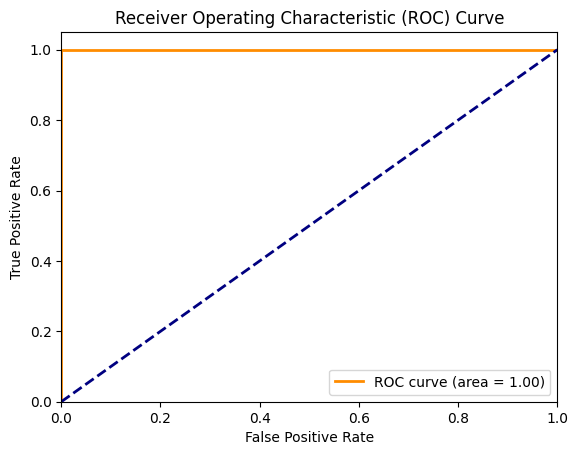

In [21]:
train_fpr_full, train_tpr_full, train_thresholds_full = roc_curve(y_train_full, train_pred_full)
train_roc_auc_full = auc(train_fpr_full, train_tpr_full)

plt.figure()
plt.plot(train_fpr_full, train_tpr_full, color='darkorange', lw=2, label=f'ROC curve (area = {train_roc_auc_score_full:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

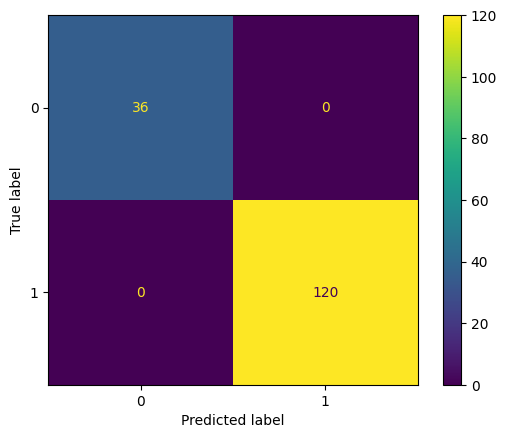

In [22]:
confusion_matrix_va_dt_full = confusion_matrix(y_train_full, train_pred_full)
cm_val_dt_full = ConfusionMatrixDisplay(confusion_matrix_va_dt_full)

cm_val_dt_full.plot()
plt.show()


*   The confusion matrix gives us further understanding of best ROC-AUC score of 1.0. 0 of the negatives have been incorrectly classified as positive. This explains the Random Forest Classifier model trained, is ideal for making correct predictions PD and healthy people.

*   However, we will further test it on larger dataset to test the model performance.



# Predicting test data

In [23]:
test_preds = rfc.predict(X_test)

In [24]:
test_acc = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds)
test_roc_auc_score = roc_auc_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds)
test_roc_curve = roc_curve(y_test, test_preds)

In [25]:
print(f"The test data accuracy is : {np.round(test_acc, 2)}")
print(f"The test data precision is : {np.round(test_precision, 2)}")
print(f"The test data recall is : {np.round(test_recall, 2)}")
print(f"The test data f1-score is : {np.round(test_f1, 2)}")
print(f"The test data ROC curve is : {np.round(test_roc_curve, 2)}")
print(f"The test data ROC-AUC score is : {np.round(test_roc_auc_score, 2)}")

The test data accuracy is : 0.95
The test data precision is : 0.96
The test data recall is : 0.96
The test data f1-score is : 0.96
The test data ROC curve is : [[0.   0.07 1.  ]
 [0.   0.96 1.  ]
 [ inf 1.   0.  ]]
The test data ROC-AUC score is : 0.94


The testing data ROC-AUC score is lower 0.94 which shows the model is not able to differentiate in positive and negative well on new data.

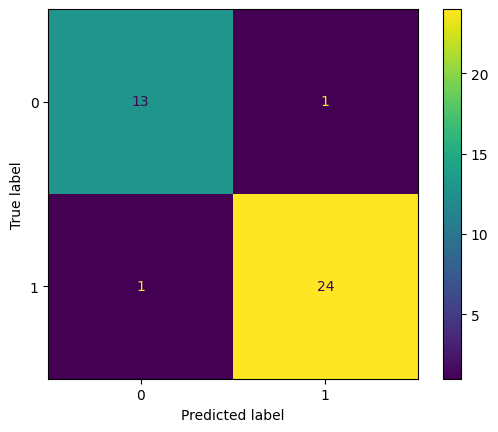

In [26]:
confusion_matrix_test_dt = confusion_matrix(y_test, test_preds)
cm_test_dt = ConfusionMatrixDisplay(confusion_matrix_test_dt)

cm_test_dt.plot()
plt.show()

Testing the trained model on the data suggests the model makes very good prediction to predict the PD and healthy people, however, it shows some signs of overfitting.